<a href="https://colab.research.google.com/github/arturbernardo/no_estimate/blob/main/analise_noestmate_com_cauda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[3.66206975 2.50187742 4.00928581 6.77892079 2.36199825 2.36202151
 7.01133194 4.30794433 2.05097516 3.76420253 2.058442   2.05558843
 3.14299876 0.86245859 0.96565302 1.93988265 1.48038372 3.28231314
 1.57646588 1.16487965 6.54950361 2.37390011 2.83067988 1.15621425
 1.96083493 2.9053491  1.36261256 3.40559208 1.89575426 2.28184369
 1.89453994 8.2595236  2.69635717 1.44105206 4.45277255 1.30668554
 3.081197   0.83878398 1.22518073 3.05908772 4.23371538 3.01265265
 2.53605831 2.26899677 1.1195052  1.76489902 2.06187701 5.12573196
 3.34066862 0.94381596 3.30174257 2.15750105 1.81094136 3.92358499
 5.04601949 4.75296233 1.6429107  2.25798444 3.31599609 4.88088754
 2.03907334 2.43173408 1.39961754 1.32614472 4.42608521 6.13336793
 2.60333659 4.96354269 3.37697931 1.84582835 3.37649221 6.84023399
 2.6604742  6.95030952 0.56448184 4.45105658 2.86402575 2.27185253
 2.87213733 0.82486021 2.38261081 3.36782637 6.5978011  1.99179824
 1.67347757 2.01163088 4.70789681 3.31100135 1.97811402 3.6986

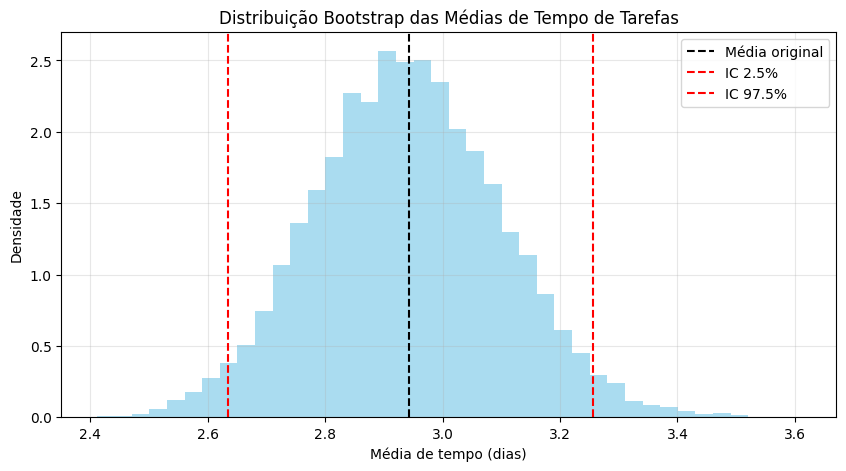

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Gerar dados históricos (exemplo)
# -----------------------------
# Simula tempos de tarefas (em dias) com cauda longa (log-normal)
np.random.seed(42)
task_times = np.random.lognormal(mean=1, sigma=0.6, size=100)
print(task_times)

# -----------------------------
# 2. Função Bootstrap
# -----------------------------
def bootstrap_mean(data, n_resamples=10_000):
    """Retorna amostras bootstrap e intervalos de confiança da média."""
    n = len(data)
    means = np.empty(n_resamples)

    for i in range(n_resamples):
        sample = np.random.choice(data, size=n, replace=True)
        means[i] = np.mean(sample)

    ci_low, ci_high = np.percentile(means, [2.5, 97.5])
    return means, ci_low, ci_high

# -----------------------------
# 3. Rodar a análise
# -----------------------------
bootstrap_means, ci_low, ci_high = bootstrap_mean(task_times)

print(f"Média original: {np.mean(task_times):.2f}")
print(f"Intervalo 95% via Bootstrap: [{ci_low:.2f}, {ci_high:.2f}]")

# -----------------------------
# 4. Visualizar resultado
# -----------------------------
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_means, bins=40, density=True, alpha=0.7, color="skyblue")
plt.axvline(np.mean(task_times), color="black", linestyle="--", label="Média original")
plt.axvline(ci_low, color="red", linestyle="--", label="IC 2.5%")
plt.axvline(ci_high, color="red", linestyle="--", label="IC 97.5%")
plt.title("Distribuição Bootstrap das Médias de Tempo de Tarefas")
plt.xlabel("Média de tempo (dias)")
plt.ylabel("Densidade")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
